In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-machines-rental/coffeeblent.csv


**Import data**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
base = pd.read_csv('../input/coffee-machines-rental/coffeeblent.csv')

As we can analyze we have 110 records and 10 columns with one being our objective.

In [4]:
base

,Unnamed: 0,customers,protests,amount due,rent amount,city,commerce,consumes,equipment,target
0,17,customer-18,0,0.0,142,city_2,commerce_2,0,equipment_1,1
1,2,customer-3,0,0.0,83,city_2,commerce_4,0,equipment_1,1
2,86,customer-87,0,0.0,99,city_1,commerce_6,1,equipment_1,1
3,48,customer-49,0,0.0,46,city_1,commerce_5,1,equipment_3,1
4,68,customer-69,0,0.0,99,city_6,commerce_1,1,equipment_2,1
...,...,...,...,...,...,...,...,...,...,...
105,35,customer-36,0,0.0,50,city_1,commerce_3,1,equipment_3,1
106,37,customer-38,0,0.0,165,city_5,commerce_2,0,equipment_1,1
107,41,customer-42,0,0.0,86,city_1,commerce_2,1,equipment_2,1
108,45,customer-46,0,0.0,46,city_1,commerce_5,1,equipment_3,1


In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   110 non-null    int64  
 1   customers    110 non-null    object 
 2   protests     110 non-null    int64  
 3   amount due   110 non-null    float64
 4   rent amount  110 non-null    int64  
 5   city         110 non-null    object 
 6   commerce     110 non-null    object 
 7   consumes     110 non-null    int64  
 8   equipment    110 non-null    object 
 9   target       110 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 8.7+ KB


**Data Analysis**

Will analyze we target columns

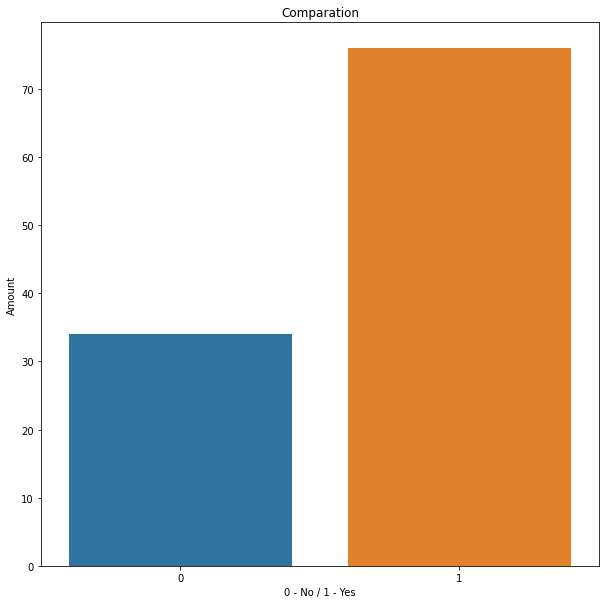

In [6]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="target", data=base)
plt.title("Comparation")
ax.set(xlabel='0 - No / 1 - Yes', ylabel='Amount')
plt.show()

*We can see that the customers bad payers often to have protests*

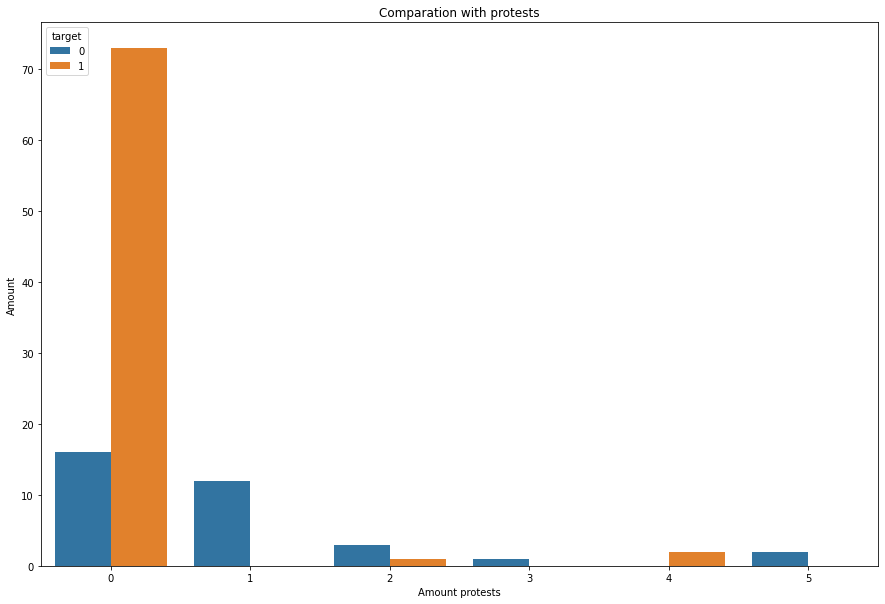

In [7]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="protests", hue="target", data=base)
plt.title("Comparation with protests")
ax.set(xlabel='Amount protests', ylabel='Amount')
plt.show()

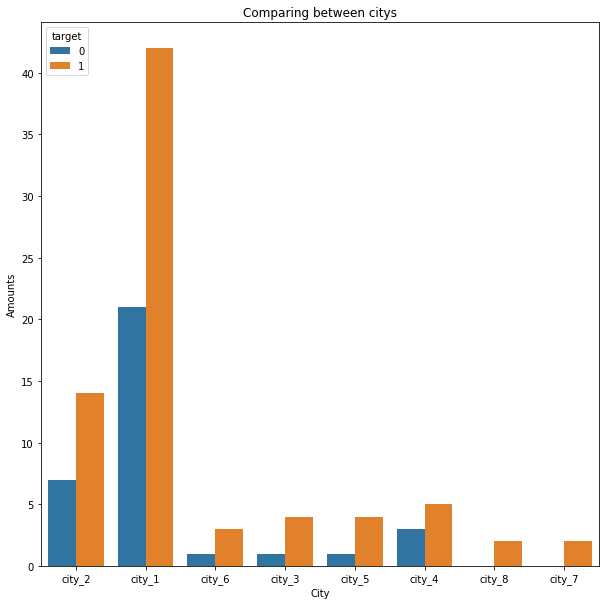

In [8]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="city", hue='target', data=base)
plt.title("Comparing between citys")
ax.set(xlabel='City', ylabel='Amounts')
plt.show()

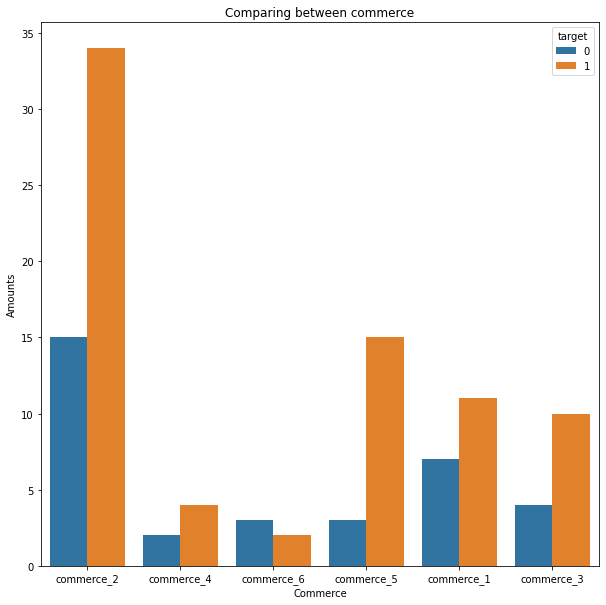

In [9]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="commerce", hue='target', data=base)
plt.title("Comparing between commerce")
ax.set(xlabel='Commerce', ylabel='Amounts')
plt.show()

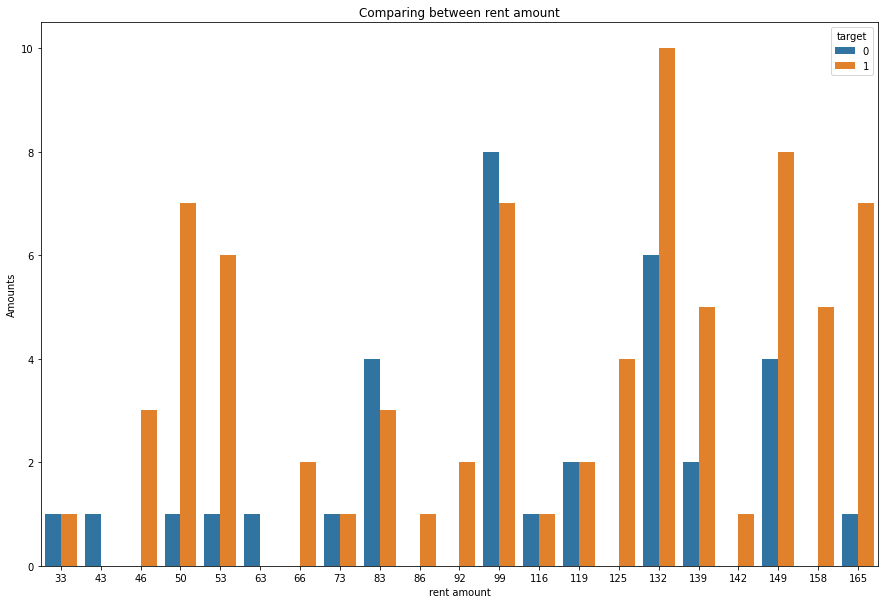

In [10]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="rent amount", hue='target', data=base)
plt.title("Comparing between rent amount")
ax.set(xlabel='rent amount', ylabel='Amounts')
plt.show()

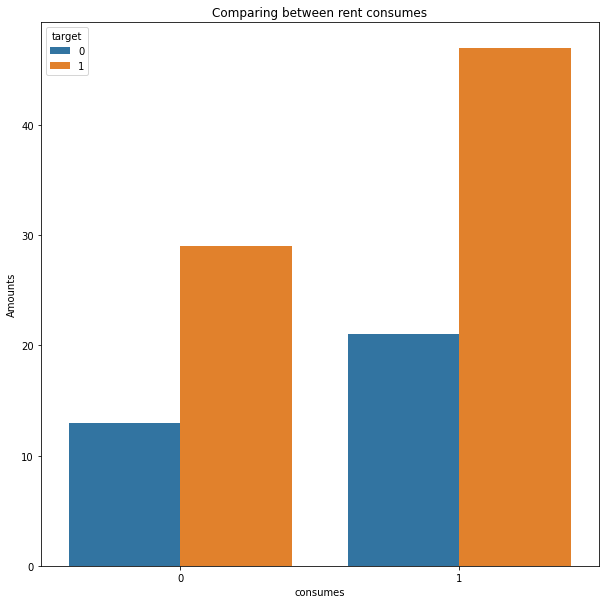

In [11]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="consumes", hue='target', data=base)
plt.title("Comparing between rent consumes")
ax.set(xlabel='consumes', ylabel='Amounts')
plt.show()

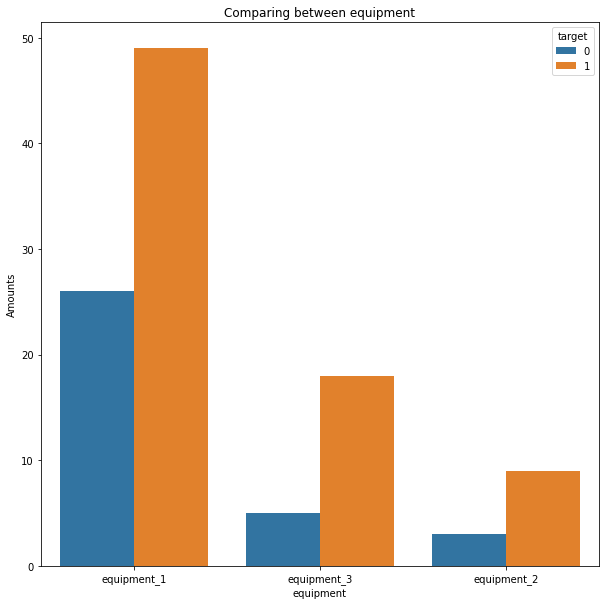

In [12]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="equipment", hue='target', data=base)
plt.title("Comparing between equipment")
ax.set(xlabel='equipment', ylabel='Amounts')
plt.show()

In [13]:
yes_df_equipment1 = base.loc[(base.target == 1) & (base.equipment == 'equipment_1')]
no_df_equipment1 = base.loc[(base.target == 0) & (base.equipment == 'equipment_1')]

*Related the equipament_1 when is rent very low amount the customers no pay.*

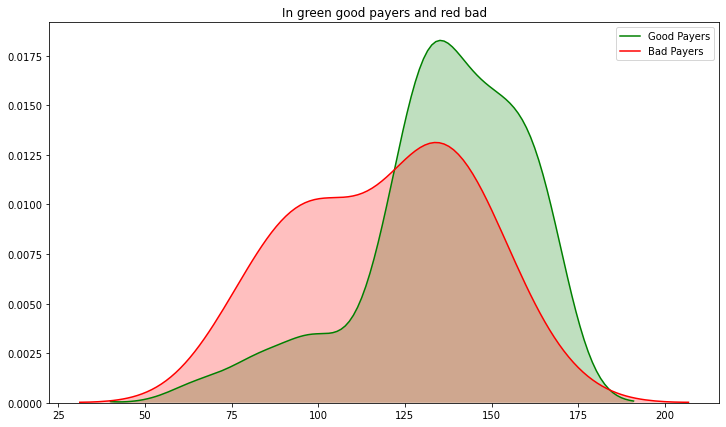

In [14]:
plt.figure(figsize=(12,7))
ax = sns.kdeplot(yes_df_equipment1['rent amount'], label = 'Good Payers', shade = True, color = 'g')
ax = sns.kdeplot(no_df_equipment1['rent amount'], label = 'Bad Payers', shade = True, color = 'r');
plt.title("In green good payers and red bad")
plt.show()

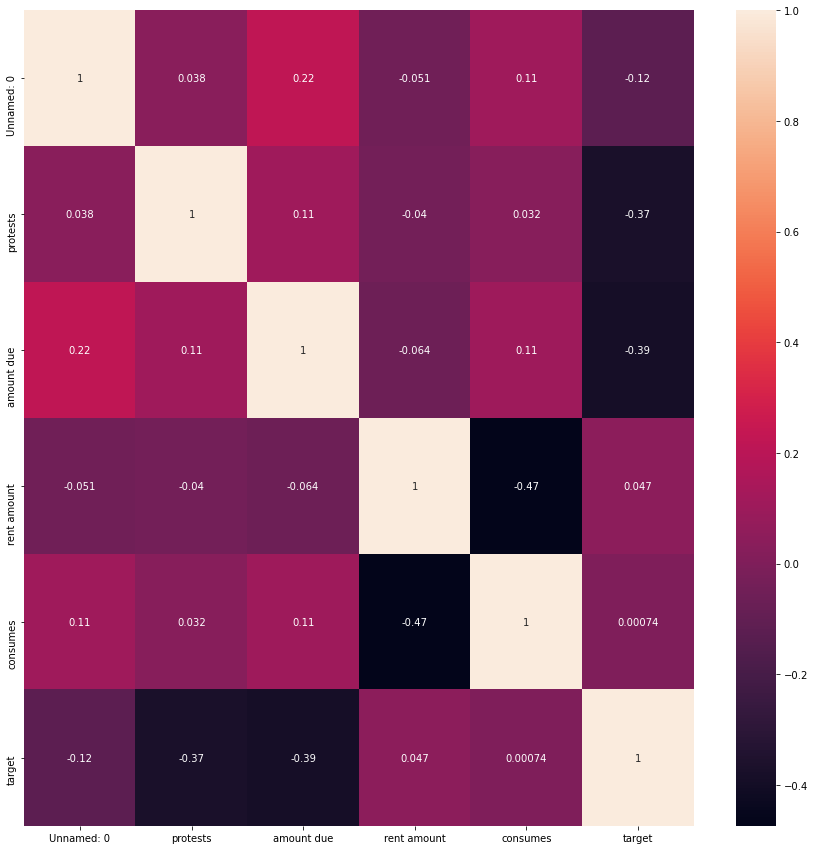

In [15]:
correlations = base.corr()

f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, annot=True)

In [16]:
yes_target = base[base['target'] == 1]
no_target = base[base['target'] == 0]

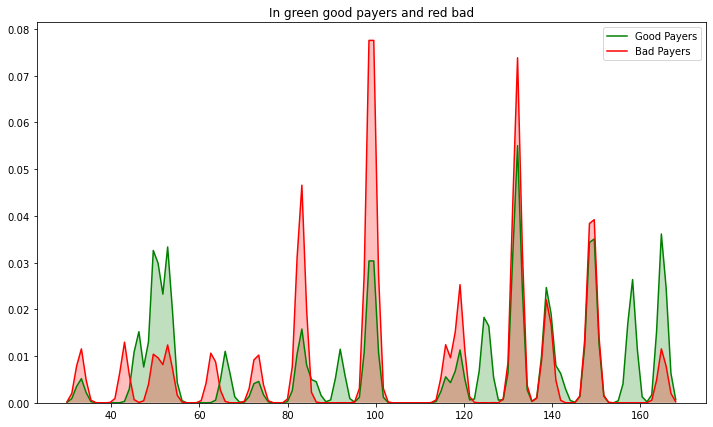

In [17]:
plt.figure(figsize=(12,7))
ax = sns.kdeplot(yes_target['rent amount'], bw=1, label = 'Good Payers', shade = True, color = 'g')
ax = sns.kdeplot(no_target['rent amount'],bw=1, label = 'Bad Payers', shade = True, color = 'r');
plt.title("In green good payers and red bad")
plt.show()

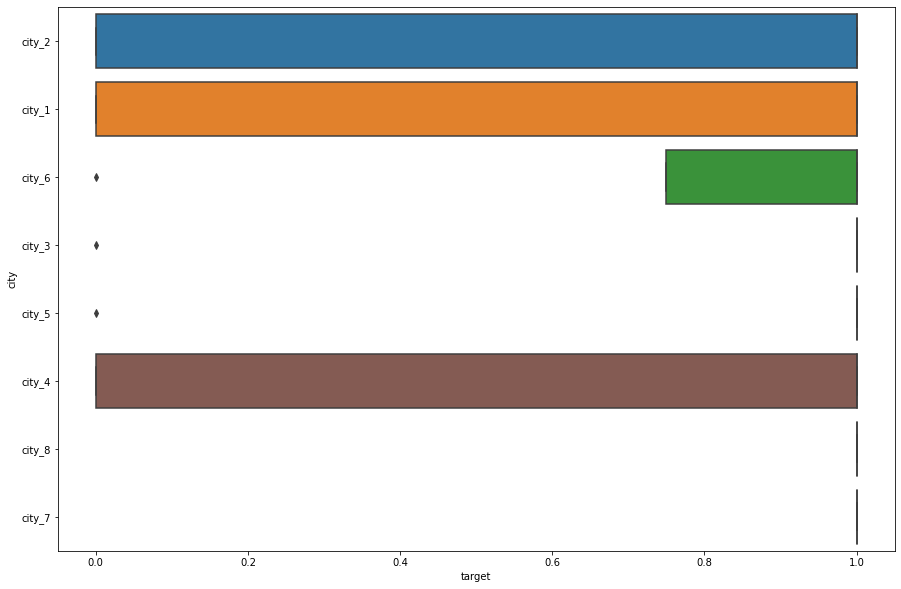

In [18]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'target', y = 'city', data=base);

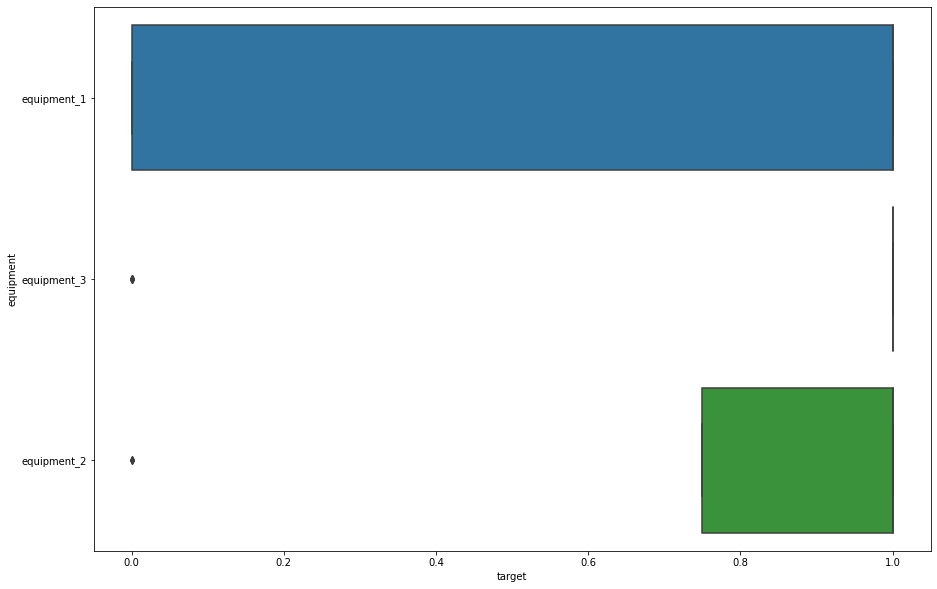

In [19]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'target', y = 'equipment', data=base);

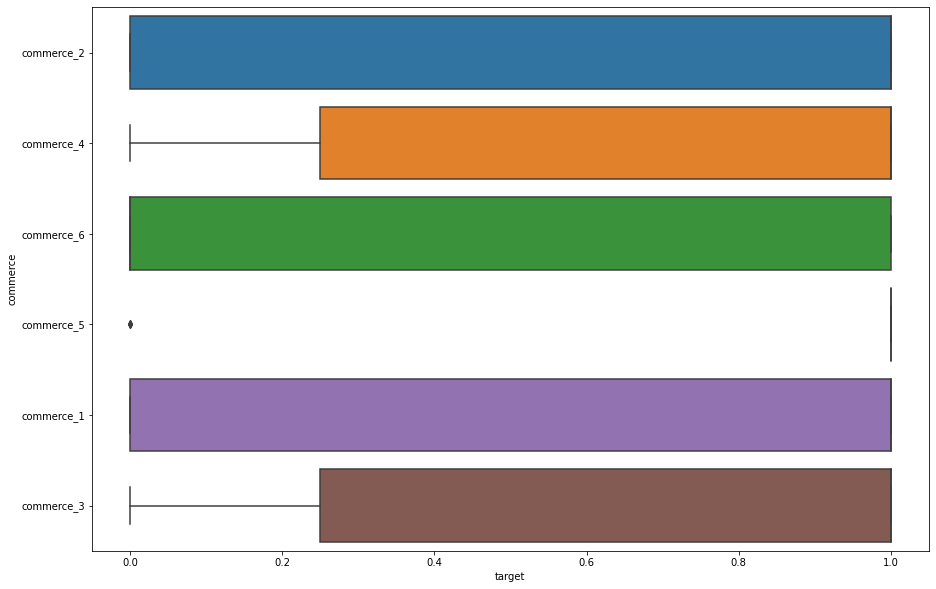

In [20]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'target', y = 'commerce', data=base);

In [21]:
base.describe()

,Unnamed: 0,protests,amount due,rent amount,consumes,target
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,54.500000,0.372727,46.204682,109.345455,0.618182,0.690909
std,31.898276,0.975471,146.826244,39.143921,0.488056,0.464234
min,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000
25%,27.250000,0.000000,0.000000,83.000000,0.000000,0.000000
50%,54.500000,0.000000,0.000000,119.000000,1.000000,1.000000
75%,81.750000,0.000000,2.680750,139.000000,1.000000,1.000000
max,109.000000,5.000000,720.000000,165.000000,1.000000,1.000000


**Preprocessing**

*We will use tree in ours predictions and no to need use one-hot-encoding.*
*We will use label-encoder*

In [22]:
base.columns

Index(['Unnamed: 0', 'customers', 'protests', 'amount due', 'rent amount',
       'city', 'commerce', 'consumes', 'equipment', 'target'],
      dtype='object')

In [23]:
base_categorical = base[['city', 'commerce', 'consumes', 'equipment']]

In [24]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)

base_categorical = base_categorical.apply(lambda x: d[x.name].fit_transform(x))

In [25]:
base_categorical.head()

,city,commerce,consumes,equipment
0,1,1,0,0
1,1,3,0,0
2,0,5,1,0
3,0,4,1,2
4,5,0,1,1


In [26]:
base_numerical = base[['protests', 'amount due', 'rent amount','consumes']]

In [27]:
base_all = pd.concat([base_numerical, base_categorical], axis = 1)

In [28]:
base_all

,protests,amount due,rent amount,consumes,city,commerce,consumes,equipment
0,0,0.0,142,0,1,1,0,0
1,0,0.0,83,0,1,3,0,0
2,0,0.0,99,1,0,5,1,0
3,0,0.0,46,1,0,4,1,2
4,0,0.0,99,1,5,0,1,1
...,...,...,...,...,...,...,...,...
105,0,0.0,50,1,0,2,1,2
106,0,0.0,165,0,4,1,0,0
107,0,0.0,86,1,0,1,1,1
108,0,0.0,46,1,0,4,1,2


In [29]:
targets = base[['target']].values

*We will use cross validation, because have low features.*

*We go use combined models for prediction, is best than use very tunnings.*

In [30]:
k = 4
num_val_samples = len(base_all) // k

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score, roc_auc_score

gb = GradientBoostingClassifier()

parameters_gb = {'learning_rate':(0.1,0.01), 'n_estimators':range(40,600,10),
                'max_depth':range(2,12,2)
              }

clf_gb = RandomizedSearchCV(gb, parameters_gb)

for i in range(k):
    print('processing fold #', i)
    #Validation
    val_data = base_all[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = targets[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = np.ravel(val_targets)
    #Training
    partial_train_data = np.concatenate([base_all[:i * num_val_samples],base_all[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([targets[:i * num_val_samples],targets[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.ravel(partial_train_targets)

    clf_gb.fit(partial_train_data, partial_train_targets)
    y_gb = clf_gb.predict_proba(val_data)[:, 1]
    print(f" Average_precision:{average_precision_score(val_targets, y_gb)}, ACU:{roc_auc_score(val_targets, y_gb)}")

processing fold # 0
 Average_precision:0.9846313107182673, ACU:0.9484126984126985
processing fold # 1
 Average_precision:0.8201741069388129, ACU:0.8210227272727272
processing fold # 2
 Average_precision:0.9673264861500156, ACU:0.9228395061728395
processing fold # 3
 Average_precision:0.9771275777162204, ACU:0.944078947368421


In [32]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(num_leaves=2, class_weight="balanced", n_jobs=6)

parameters_lgbm = {'learning_rate':(0.1,0.01), 'n_estimators':range(40,600,10),
                'max_depth':range(2,12,2),
              }

clf_lgbm = RandomizedSearchCV(lgbm, parameters_lgbm)

for i in range(k):
    print('processing fold #', i)
    #Validation
    val_data = base_all[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = targets[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = np.ravel(val_targets)
    #Training
    partial_train_data = np.concatenate([base_all[:i * num_val_samples],base_all[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([targets[:i * num_val_samples],targets[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.ravel(partial_train_targets)

    clf_lgbm.fit(partial_train_data, partial_train_targets)
    y_lgbm = clf_lgbm.predict_proba(val_data)[:, 1]
    print(f" Average_precision:{average_precision_score(val_targets, y_lgbm)}, ACU:{roc_auc_score(val_targets, y_lgbm)}")

processing fold # 0
 Average_precision:0.9846313107182674, ACU:0.9444444444444445
processing fold # 1
 Average_precision:0.8396990740740741, ACU:0.8465909090909091
processing fold # 2
 Average_precision:0.9106753812636165, ACU:0.8888888888888888
processing fold # 3
 Average_precision:0.8898635477582846, ACU:0.8289473684210527


**Combined models - Fold 3**

In [33]:
y_all = (y_gb*0.5) + (y_lgbm*0.5)

In [34]:
print(f" Average_precision:{average_precision_score(val_targets, y_all)}, ACU:{roc_auc_score(val_targets, y_all)}")

 Average_precision:0.9771490775442218, ACU:0.9407894736842105
